/home/j/Desktop/MLotsawa/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/j/Desktop/MLotsawa/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/j/Desktop/MLotsawa/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/j/Desktop/MLotsawa/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/j/Desktop/MLotsawa/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/j/Desktop/MLotsawa/.venv/lib/python3.10/site-packages/numpy/lib/_functio

<Figure size 1200x1000 with 0 Axes>

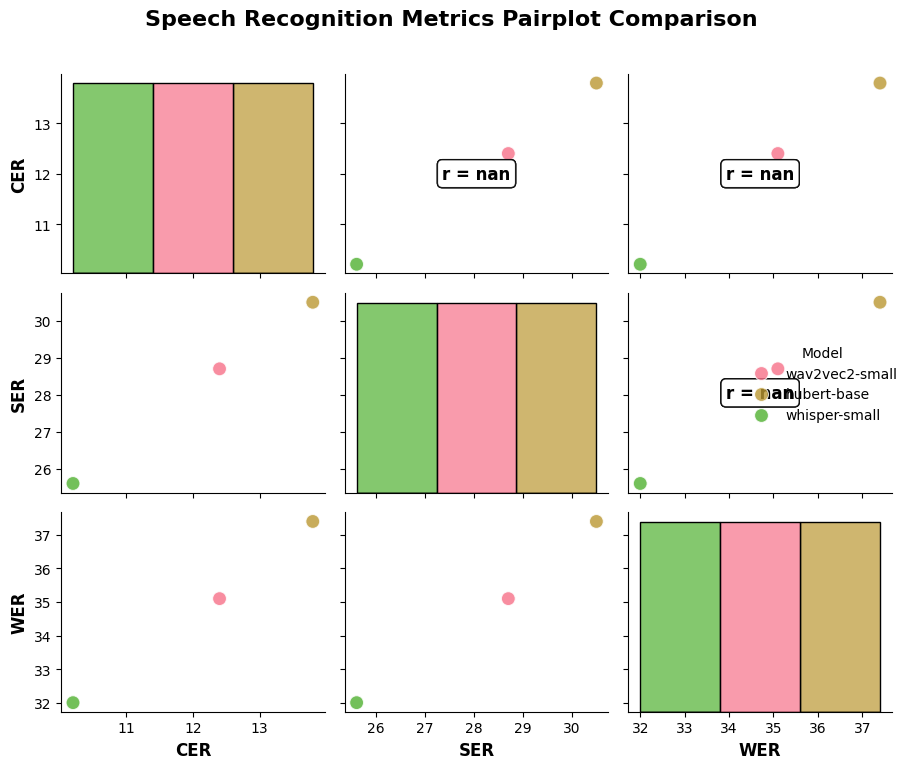


ALTERNATIVE VERSION WITH MORE CUSTOMIZATION


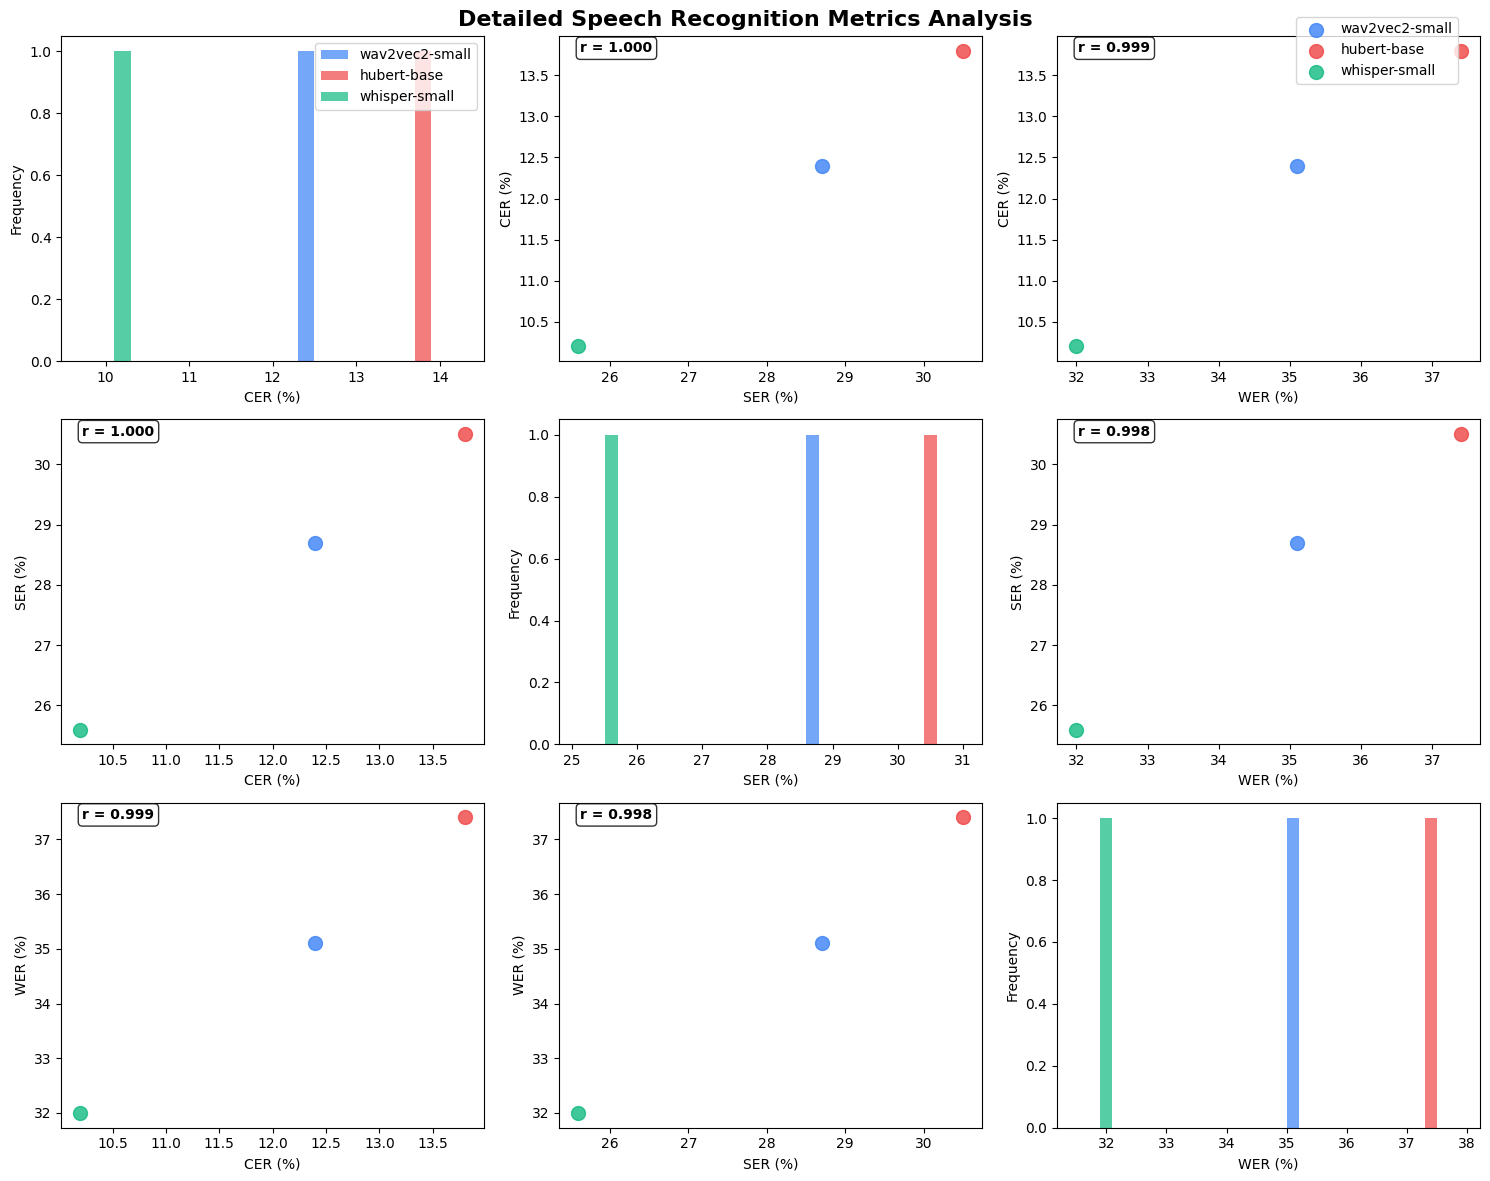


SUMMARY STATISTICS

Correlation Matrix:
       CER    SER    WER
CER  1.000  1.000  0.999
SER  1.000  1.000  0.998
WER  0.999  0.998  1.000

Model Performance Summary:
----------------------------------------
wav2vec2-small:
  CER: 12.4%
  SER: 28.7%
  WER: 35.1%
  Average: 25.4%

hubert-base:
  CER: 13.8%
  SER: 30.5%
  WER: 37.4%
  Average: 27.2%

whisper-small:
  CER: 10.2%
  SER: 25.6%
  WER: 32.0%
  Average: 22.6%

Best Performing Model by Metric:
-----------------------------------
CER: whisper-small (10.2%)
SER: whisper-small (25.6%)
WER: whisper-small (32.0%)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset
data = {
    'Model': ['wav2vec2-small', 'hubert-base', 'whisper-small'],
    'CER': [12.4, 13.8, 10.2],
    'SER': [28.7, 30.5, 25.6],
    'WER': [35.1, 37.4, 32.0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create the pairplot
fig = plt.figure(figsize=(12, 10))

# Create pairplot with custom styling
g = sns.pairplot(
    data=df,
    vars=['CER', 'SER', 'WER'],  # Only plot the metric columns
    hue='Model',                 # Color by model
    diag_kind='hist',           # Histogram on diagonal
    plot_kws={'s': 100, 'alpha': 0.8},  # Scatter plot styling
    diag_kws={'alpha': 0.7}     # Histogram styling
)

# Customize the plot
g.fig.suptitle('Speech Recognition Metrics Pairplot Comparison', 
               fontsize=16, fontweight='bold', y=1.02)

# Add correlation coefficients to upper triangle
def add_correlation(x, y, **kwargs):
    """Add correlation coefficient to the plot"""
    corr = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.text(0.5, 0.5, f'r = {corr:.3f}', 
            transform=ax.transAxes, 
            ha='center', va='center',
            fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Map the correlation function to upper triangle
g.map_upper(add_correlation)

# Customize axis labels
for ax in g.axes.flat:
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='bold')
        ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='bold')

# Adjust layout and show
plt.tight_layout()
plt.show()

# Alternative: More detailed pairplot with additional customizations
print("\n" + "="*60)
print("ALTERNATIVE VERSION WITH MORE CUSTOMIZATION")
print("="*60)

# Create a more customized version
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Define colors for each model
colors = {'wav2vec2-small': '#3b82f6', 'hubert-base': '#ef4444', 'whisper-small': '#10b981'}
metrics = ['CER', 'SER', 'WER']

for i, metric_y in enumerate(metrics):
    for j, metric_x in enumerate(metrics):
        ax = axes[i, j]
        
        if i == j:  # Diagonal - show distribution
            for model in df['Model'].unique():
                model_data = df[df['Model'] == model]
                ax.hist(model_data[metric_x], alpha=0.7, label=model, 
                       color=colors[model], bins=5)
            ax.set_xlabel(metric_x + ' (%)')
            ax.set_ylabel('Frequency')
            if i == 0:  # Only show legend on first diagonal plot
                ax.legend()
                
        else:  # Off-diagonal - scatter plot
            for model in df['Model'].unique():
                model_data = df[df['Model'] == model]
                ax.scatter(model_data[metric_x], model_data[metric_y], 
                          label=model, color=colors[model], s=100, alpha=0.8)
            
            # Add correlation coefficient
            corr = df[metric_x].corr(df[metric_y])
            ax.text(0.05, 0.95, f'r = {corr:.3f}', 
                   transform=ax.transAxes, fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            ax.set_xlabel(metric_x + ' (%)')
            ax.set_ylabel(metric_y + ' (%)')

# Add overall title and legend
fig.suptitle('Detailed Speech Recognition Metrics Analysis', 
             fontsize=16, fontweight='bold')

# Add a single legend for the entire figure
handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

# Calculate and display correlation matrix
correlation_matrix = df[['CER', 'SER', 'WER']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

# Print model performance summary
print("\nModel Performance Summary:")
print("-" * 40)
for _, row in df.iterrows():
    print(f"{row['Model']}:")
    print(f"  CER: {row['CER']}%")
    print(f"  SER: {row['SER']}%") 
    print(f"  WER: {row['WER']}%")
    print(f"  Average: {(row['CER'] + row['SER'] + row['WER'])/3:.1f}%")
    print()

# Identify best performing model for each metric
print("Best Performing Model by Metric:")
print("-" * 35)
for metric in ['CER', 'SER', 'WER']:
    best_model = df.loc[df[metric].idxmin(), 'Model']
    best_value = df[metric].min()
    print(f"{metric}: {best_model} ({best_value}%)")